# First Kaggle challenge - Titanic

## Machine Learning from Disaster

- v0.1_112020
- *uthor: marcusRB*
- [Kaggle - Titanic challenge](https://www.kaggle.com/c/titanic/)

***

### 1. The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### What Data Will I Use in This Competition?
In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.
1. [X] Question or problem definition.
2. [ ] Acquire training and testing data.
3. [ ] Wrangle, prepare, cleanse the data.
4. [ ] Analyze, identify patterns, and explore the data.
5. [ ] Model, predict and solve the problem.
6. [ ] Visualize, report, and present the problem solving steps and final solution.
7. [ ] Supply or submit the results.

* * *
## 2a. Check the versions of libraries

In [1]:
# Check the versions of libraries MacOS

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) 
[GCC 7.3.0]
scipy: 1.3.1
numpy: 1.18.2
matplotlib: 3.2.1
pandas: 0.23.0
sklearn: 0.21.3


In [ ]:
# Import new packages
#!pip install xlrd

## Import libraries

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import xlrd, xdrlib

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
#from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union, Pipeline
from sklearn import preprocessing
# Wrangle missing value
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

***
## Load dataset

Kaggle provee dos datasets: `train` y `test`.

#### En el caso de realizar la conexión con la API de Kaggle 

Instalar la librería kaggle

```
!pip install kaggle
```
Sucesivamente damos permisos a la carpeta del json 

```
!chmod 600 /home/*vuestro_username*/.kaggle/kaggle.json
```

Una vez habilitados los permisos a la carpeta `.kaggle` lanzamos esta linea de comando API

```
!kaggle competitions download -c titanic
```

In [ ]:
#!pip install kaggle
#!chmod 600 /home/jovyan/.kaggle/kaggle.json

In [ ]:
#!kaggle competitions download -c titanic

Necesitamos ahora descomprimir el fichero.zip

```
!unzip -o titanic.zip
```

In [ ]:
#!unzip -o titanic.zip

***

In [3]:
## Load dataset
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

# Necesitamos separar los ids de los pasajeros para utilizarlos al final del modelo de submit
ids = test_dataset['PassengerId']

In [4]:
train_dataset.head(10)
test_dataset.head(10)
ids.head(10)

0    892
1    893
2    894
3    895
4    896
5    897
6    898
7    899
8    900
9    901
Name: PassengerId, dtype: int64

In [5]:
# Unificamos los dos dataset para poder procesarlos conjuntamente
titanic_list = pd.concat(objs=[train_dataset, test_dataset],
                         axis=0).reset_index(drop=True)
titanic_list

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [6]:
# Comprobamos la forma de nuestro dataset
train_dataset.shape, test_dataset.shape

((891, 12), (418, 11))

In [7]:
titanic_list.shape

(1309, 12)

In [8]:
titanic_list.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [9]:
titanic_list.tail(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1299,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,NaN,334915
1300,3.0,NaN,S,13.7750,"Peacock, Miss. Treasteall",1,1301,3,female,1,NaN,SOTON/O.Q. 3101315
1301,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,NaN,365237
1302,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1303,1,female,1,NaN,19928
1303,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",0,1304,3,female,0,NaN,347086
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
1308,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


***

## Data description

Nuestro conjunto de datos tiene 12 columnas o varables, de las cuales 3 (Age, Cabin y Embarked) tienen valores no disponibles. La variable que queremos predecir es Survived, que nos indica si el pasajero sobrevivió a la tragedia del Titanic.

In [10]:
# Check dataframe structure
titanic_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [11]:
# Describimos nuestro dataset
titanic_list.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


***
## EDA, Visualization and transformation data

realizamos el check de cada atributo, buscamos valores atípicos, nulos, errores y eventualmente creamos nuevos atributos.

In [12]:
# Check null y NA para ambos dataset
titanic_list.isna()

# el resultado será una tabla con valores booleanos

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False
5,True,True,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,False,False


In [13]:
# Necesitaré agruparlos y sumarlos
titanic_list.isna().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [14]:
# Buscamos la frecuencia relativa
titanic_list.isnull().sum()/len(titanic_list)*100

Age            20.091673
Cabin          77.463713
Embarked        0.152788
Fare            0.076394
Name            0.000000
Parch           0.000000
PassengerId     0.000000
Pclass          0.000000
Sex             0.000000
SibSp           0.000000
Survived       31.932773
Ticket          0.000000
dtype: float64

Deberíamos realizar un trabajo de manipulación de los datos nulos para `Age`, `Embarked`, `Fare`. Para la variable `Cabin`podemos eliminarla o tratarla.

*** 
### `PassengerId`

realizamos el check del atributo PassengerId

In [15]:
titanic_list['PassengerId'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

No va aportar ningun valor a nuestro modelo, por lo tanto eliminaremos este atributo

In [16]:
titanic_list_bak = titanic_list

In [17]:
# Guardamos copia
titanic_list_bak

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


In [18]:
# Eliminamos el PassengerId del dataset
titanic_list.drop(['PassengerId'],
                  axis=1,
                  inplace=True)

In [19]:
# Check dataset
titanic_list

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1.0,237736


***

## `Survived`

Nuestra variable predictora o dependiente, verificamos las correctas etiquetas `0` y `1` , aprox 38%

In [20]:
len(train_dataset)

891

In [21]:
len(test_dataset)

418

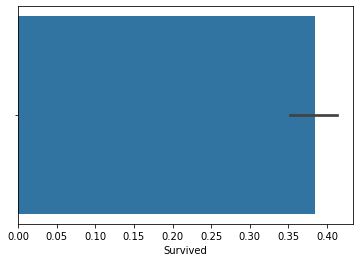

In [22]:
titanic_list['Survived'][:891] = titanic_list['Survived'][:891].astype(int)
sns.barplot(x = "Survived",
            data = titanic_list)

In [23]:
titanic_list.describe()['Survived']

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

***
## `Pclass`

Check ticket class. Es una variable categórica con 3 valores

In [24]:
titanic_list[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


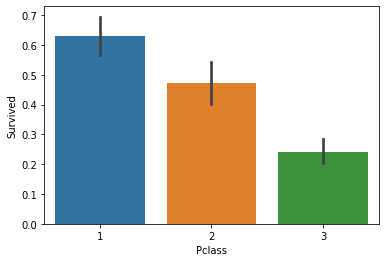

In [25]:
sns.barplot(x = 'Pclass',
           y = 'Survived',
           data = titanic_list)

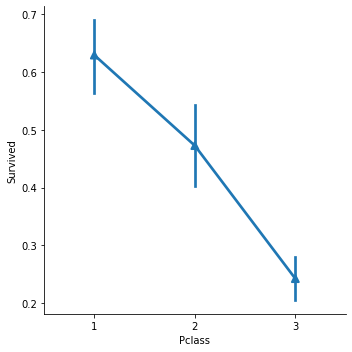

In [26]:
sns.catplot(x="Pclass", y="Survived", hue=None,
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic_list)

## `Sex`

In [27]:
# Representamos gráficamente el atributo Sex
print(titanic_list['Sex'].value_counts(sort = False))

male      843
female    466
Name: Sex, dtype: int64


In [28]:
print(titanic_list['Sex'].value_counts(sort = False, normalize = True))

male      0.644003
female    0.355997
Name: Sex, dtype: float64


Text(0.5, 1.0, 'Survive v/s Sex')

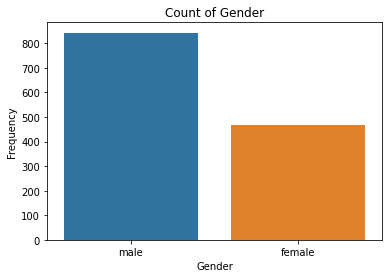

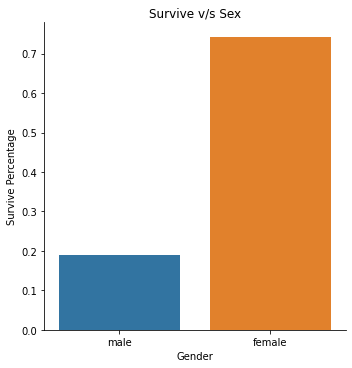

In [29]:
# Visualising counts of Gender with bar graph
sns.countplot(x="Sex", data=titanic_list);
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Count of Gender')

# Showing proportion of survival for different type of gender
sns.catplot(x="Sex", y="Survived", data=titanic_list, kind="bar", ci=None)
plt.xlabel('Gender')
plt.ylabel('Survive Percentage')
plt.title('Survive v/s Sex')

In [30]:
# Procedemos a la binarización de la variable Sex en 0 y 1
titanic_list_bak = titanic_list # guardamos copia

In [31]:
titanic_list['Sex'] = titanic_list['Sex'].map({
    'female' : 1,
    'male': 0
})
titanic_list['Sex']

0       0
1       1
2       1
3       1
4       0
5       0
6       0
7       0
8       1
9       1
10      1
11      1
12      0
13      0
14      1
15      1
16      0
17      0
18      1
19      1
20      0
21      0
22      1
23      0
24      1
25      1
26      0
27      0
28      1
29      0
       ..
1279    0
1280    0
1281    0
1282    1
1283    0
1284    0
1285    0
1286    1
1287    0
1288    1
1289    0
1290    0
1291    1
1292    0
1293    1
1294    0
1295    0
1296    0
1297    0
1298    0
1299    1
1300    1
1301    1
1302    1
1303    1
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Sex, Length: 1309, dtype: int64

In [32]:
# Check Sex features
titanic_list['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

## `SibSp`

In [33]:
titanic_list[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


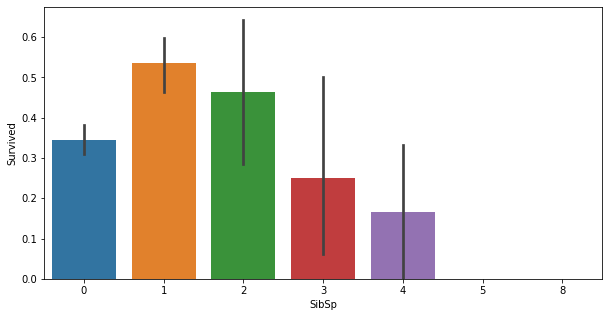

In [34]:
plt.figure(figsize= [10.0, 5.0])
sns.barplot(x="SibSp", y="Survived", data=titanic_list)
plt.show()

## `Parch`

In [35]:
titanic_list[['Parch','Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000
7,9,NaN


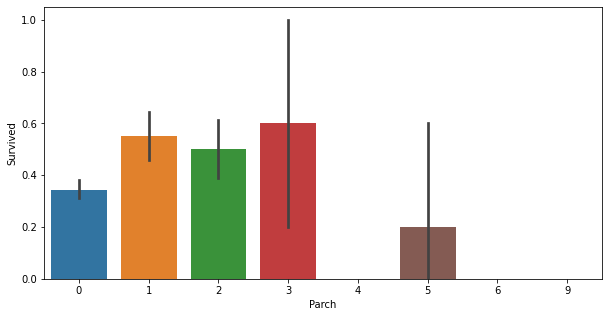

In [36]:
plt.figure(figsize= [10.0, 5.0])
sns.barplot(x="Parch", y="Survived", data=titanic_list)
plt.show()

## `Ticket`

Ticket number no aporta información

In [37]:
titanic_list['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [38]:
# Eliminamos la columna Ticket
titanic_list.drop(['Ticket'],
                 axis = 1,
                 inplace = True)

In [39]:
titanic_list.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,0,1,0.0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,1,1,1.0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,1,0,1.0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,1,1.0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,0,0,0.0
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,0,0,0.0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,0,0,0.0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,0,3,0.0
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,1,0,1.0
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,1,1,1.0


***

## `Embarked`
Tenemos 3 valores: `C` for Cherbourg, `Q` for Queenstown, `S` for Southampton.

In [40]:
titanic_list[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [41]:
# Tenemos que tratar los valores nulos. Un método es con el most_frequent
freq_port = titanic_list.Embarked.dropna().mode()[0]
freq_port

'S'

In [42]:
# Asignamos el valor frecuente
titanic_list['Embarked'] = titanic_list['Embarked'].fillna(freq_port)

In [43]:
# Raelizamos el check de su distribución
titanic_list['Embarked'].describe()

count     1309
unique       3
top          S
freq       916
Name: Embarked, dtype: object

In [44]:
# Visualizamos la variable Embarked
titanic_list[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


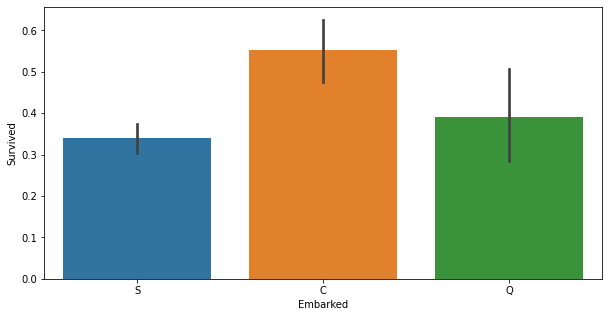

In [45]:
plt.figure(figsize= [10.0, 5.0])
sns.barplot(x="Embarked", y="Survived", data=titanic_list)
plt.show()

***
## `Fare` 

buscamos la distribución de la variable continua

In [46]:
titanic_list['Fare'].value_counts()

8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
10.5000    35
7.7750     26
7.2292     24
7.9250     23
26.5500    22
8.6625     21
7.8542     21
7.2250     21
7.2500     18
0.0000     17
21.0000    14
9.5000     12
16.1000    12
14.5000    11
69.5500    11
27.7208    11
7.7958     10
14.4542    10
7.8792     10
15.5000    10
24.1500     9
15.2458     9
7.0500      9
56.4958     8
46.9000     8
           ..
45.5000     1
8.4333      1
8.1583      1
8.0292      1
12.7375     1
31.6833     1
42.5000     1
34.0208     1
25.9250     1
12.6500     1
7.0458      1
49.5000     1
7.7208      1
32.3208     1
6.4500      1
8.3000      1
7.5208      1
28.7125     1
25.5875     1
7.7292      1
9.8458      1
8.6542      1
25.7000     1
10.1708     1
7.3125      1
33.5000     1
7.8000      1
26.3875     1
15.5792     1
7.1417      1
Name: Fare, Length: 281, dtype: int64

In [47]:
titanic_list['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [48]:
titanic_list['Fare'].isna().sum()

1

In [49]:
# Tratamos los valorse nulos 
# Doing same steps before for the second dataset
s = titanic_list['Fare'].value_counts(normalize=True)
missing = titanic_list['Fare'].isnull()
titanic_list.loc[missing,'Fare'] = np.random.choice(s.index, size=len(titanic_list[missing]),
                                                      p=s.values).astype(int)
titanic_list['Fare']

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
5         8.4583
6        51.8625
7        21.0750
8        11.1333
9        30.0708
10       16.7000
11       26.5500
12        8.0500
13       31.2750
14        7.8542
15       16.0000
16       29.1250
17       13.0000
18       18.0000
19        7.2250
20       26.0000
21       13.0000
22        8.0292
23       35.5000
24       21.0750
25       31.3875
26        7.2250
27      263.0000
28        7.8792
29        7.8958
          ...   
1279      7.7500
1280     21.0750
1281     93.5000
1282     39.4000
1283     20.2500
1284     10.5000
1285     22.0250
1286     60.0000
1287      7.2500
1288     79.2000
1289      7.7750
1290      7.7333
1291    164.8667
1292     21.0000
1293     59.4000
1294     47.1000
1295     27.7208
1296     13.8625
1297     10.5000
1298    211.5000
1299      7.7208
1300     13.7750
1301      7.7500
1302     90.0000
1303      7.7750
1304      8.0500
1305    108.9000
1306      7.25

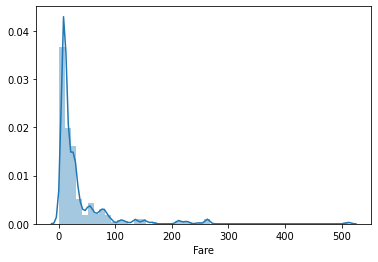

In [50]:
sns.distplot(titanic_list['Fare'])

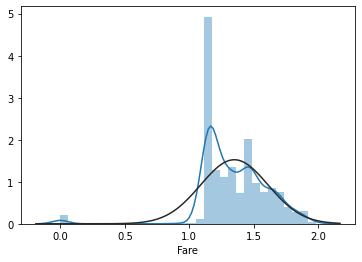

In [52]:
# Para poder normalizar los valores
titanic_list['Fare'] = np.log1p(titanic_list['Fare'])
sns.distplot(titanic_list['Fare'] , fit = norm)

## `Cabin`

In [53]:
pd.unique(titanic_list.Cabin)

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

B37            1
D45            1
C22 C26        4
B35            2
C104           1
D46            1
B18            2
B20            2
E10            1
B50            1
B30            1
E121           2
C62 C64        2
C106           2
E36            1
C83            2
E39 E41        1
F33            4
D34            1
A16            1
F E46          1
E17            1
B80            1
F2             4
E25            2
B69            2
A20            1
D11            1
A24            1
C82            1
              ..
C6             2
B51 B53 B55    3
B96 B98        4
B82 B84        1
D30            2
C39            1
A14            1
E50            2
A18            1
C46            2
B102           1
A23            1
E67            2
C65            2
C23 C25 C27    6
B58 B60        3
C101           3
C31            2
C105           1
C116           2
G6             5
C89            2
B19            1
F              1
B5             2
D40            1
C111           1
C53           

Text(0.5, 1.0, 'Survive v/s Cabin')

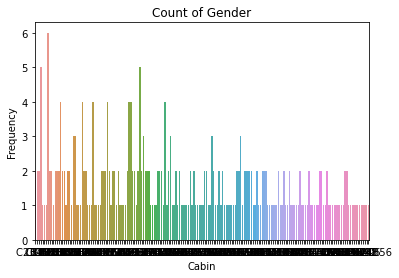

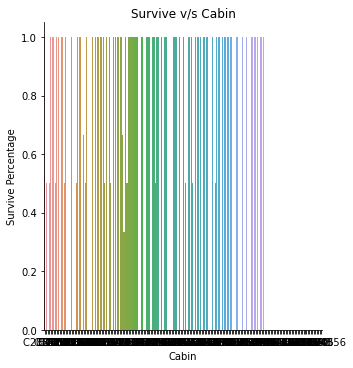

In [54]:
# Printing counts and percentage of male and female
print(titanic_list['Cabin'].value_counts(sort=False))
print(titanic_list['Cabin'].value_counts(sort=False,normalize=True))

# Making variable  categorical 
#sub['SEX'] = sub['SEX'].astype('category')

# Visualising counts of Gender with bar graph
sns.countplot(x="Cabin", data=titanic_list);
plt.xlabel('Cabin')
plt.ylabel('Frequency')
plt.title('Count of Gender')

# Showing proportion of survival for different type of gender
sns.catplot(x="Cabin", y="Survived", data=titanic_list, kind="bar", ci=None)
plt.xlabel('Cabin')
plt.ylabel('Survive Percentage')
plt.title('Survive v/s Cabin')

Dejamos por el momento la variable `Cabin`

## `Name`

Variable categórica tenemos Mr. Miss o Master.

In [55]:
# check
titanic_list['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [59]:
len(titanic_list['Name'][0])

23

In [58]:
# Creamos una función para realizar la extracción de los títulos según un patrón - utilizando la función RE (RegExp)
# https://es.wikipedia.org/wiki/Expresi%C3%B3n_regular
import re
help(re)

Help on module re:

NAME
    re - Support for regular expressions (RE).

MODULE REFERENCE
    https://docs.python.org/3.7/library/re
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides regular expression matching operations similar to
    those found in Perl.  It supports both 8-bit and Unicode strings; both
    the pattern and the strings being processed can contain null bytes and
    characters outside the US ASCII range.
    
    Regular expressions can contain both special and ordinary characters.
    Most ordinary characters, like "A", "a", or "0", are the simplest
    regular expressions; they simply match themselves.  You can
    concatenate ordinary characters, so last mat

***
Creamos una función para la extracción del título que se encuentra con el siguente patrón
```
string coma space TITULO punto space
```

In [61]:
# Creamos la función
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [62]:
# Aplicamos esta función a una nueva dimensión / columna / atributo del dataset
titanic_list['TitleName'] = titanic_list['Name'].apply(get_title)

In [64]:
titanic_list['TitleName'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: TitleName, dtype: object

In [66]:
# check
pd.crosstab(titanic_list['TitleName'], titanic_list['Sex'])

Sex,0,1
TitleName,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


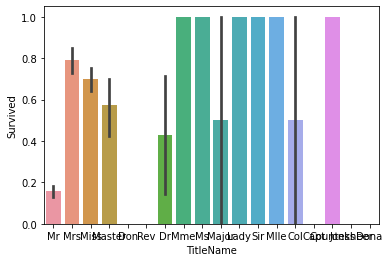

In [73]:
import matplotlib.pyplot as plt
sns.barplot(x="TitleName", y="Survived", data=titanic_list, ci=90)
plt.show()

In [76]:
# Convertimos a variable categorica
listaTitle = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer','Dona']
titanic_list["TitleName"] = titanic_list["TitleName"].replace(listaTitle, 'Rare')

In [77]:
# Check the results
pd.crosstab(titanic_list['TitleName'], titanic_list['Sex'])

Sex,0,1
TitleName,,
Master,61,0
Miss,0,260
Mlle,0,2
Mme,0,1
Mr,757,0
Mrs,0,197
Ms,0,2
Rare,25,4


In [78]:
# check survived
pd.crosstab(titanic_list['TitleName'], titanic_list['Survived'])

Survived,0.0,1.0
TitleName,,
Master,17,23
Miss,55,127
Mlle,0,2
Mme,0,1
Mr,436,81
Mrs,26,99
Ms,0,1
Rare,15,8


## `Age`


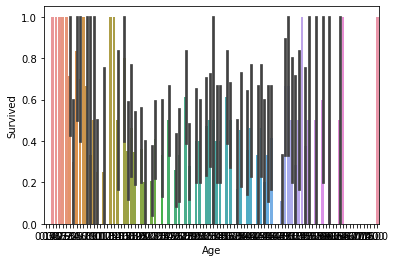

In [79]:
sns.barplot(x='Age', y='Survived', data=titanic_list)

In [80]:
titanic_list.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [82]:
bins = [-1, 0, 5, 12, 18, 24, 35, 50, 65, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Mid-Senior', 'Senior']

In [83]:
# Imputamos los valores nulos con -0.5
titanic_list['Age'] = titanic_list['Age'].fillna(-0.5)

In [84]:
# Creamos un nuevo atributo de agrupaciones
titanic_list['AgeGroup'] = pd.cut(titanic_list['Age'], bins, labels = labels)

In [87]:
titanic_list['AgeGroup'].head(20)

0         Student
1           Adult
2     Young Adult
3     Young Adult
4     Young Adult
5         Unknown
6      Mid-Senior
7            Baby
8     Young Adult
9        Teenager
10           Baby
11     Mid-Senior
12        Student
13          Adult
14       Teenager
15     Mid-Senior
16           Baby
17        Unknown
18    Young Adult
19        Unknown
Name: AgeGroup, dtype: category
Categories (9, object): [Unknown < Baby < Child < Teenager ... Young Adult < Adult < Mid-Senior < Senior]

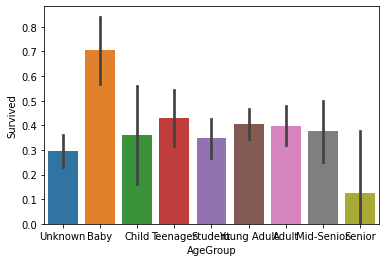

In [88]:
sns.barplot(x = "AgeGroup", y = "Survived" , data = titanic_list)

*** 


## Features Engineering

creación de nuevos atributos, o extracción de nuevos atributos

### FamilySize

Suma de `SibSp` y `Parch`

In [140]:
# creamos un nuevo atributo FamilySize
titanic_list['FamilySize'] = titanic_list['SibSp'] + titanic_list['Parch']

In [141]:
titanic_list[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean()

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


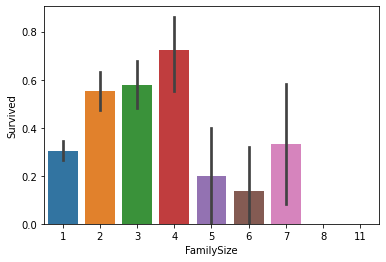

In [93]:
sns.barplot(x = "FamilySize", y = "Survived", data = titanic_list)

***

### `IsAlone`

creamos una nueva dimensión del pasajero que viaja solo


In [145]:
# Creamos el atributo IsAlone = 0
titanic_list['IsAlone'] = 0

# Buscamos el valor de FamilySize == 0 y lo copiamos en IsAlone = 1, el resto se quedan en ceros
titanic_list.loc[titanic_list['FamilySize'] == 0, 'IsAlone'] = 1

In [146]:
# Check 
titanic_list[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


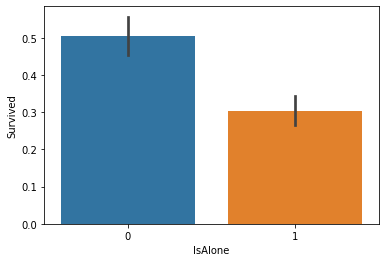

In [113]:
sns.barplot(x = 'IsAlone', y = 'Survived', data = titanic_list)

***

## `FareGroup`

creamos grupos de tarifas

In [147]:
# Creamos 4 grupos nuevos de tarifas
fareLabels = ['Basic', 'Bronce', 'Silver', 'Gold']

# com la función qcut creamos en 5 cuantiles y le asignamos las etiquetas
titanic_list['FareGroup'] = pd.qcut(titanic_list['Fare'], 4, labels = fareLabels)

In [148]:
titanic_list[['FareGroup' , 'Survived']].groupby(['FareGroup'], as_index = False).mean()

,FareGroup,Survived
0,Basic,0.197309
1,Bronce,0.303571
2,Silver,0.441048
3,Gold,0.600000


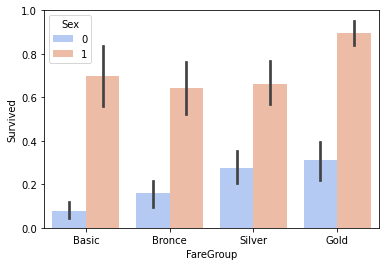

In [149]:
sns.barplot(x = "FareGroup" , y = "Survived", data = titanic_list, hue = "Sex", palette = "coolwarm")

***

## `InCabin`

creamos una nueva dimensión InCabin que nos indica si el pasajero estuvo o no en la cabina

In [129]:
# creamos la nueva dimensión excluyendo el resto de pasajeros con valores nulos. ¡Ojo! son el 78%-...
titanic_list['InCabin'] = ~titanic_list['Cabin'].isnull()

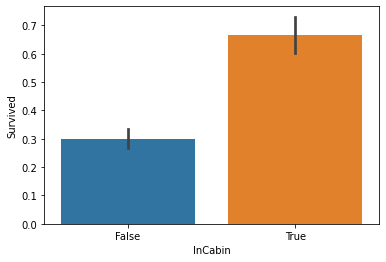

In [130]:
sns.barplot(x = 'InCabin', y = 'Survived', data = titanic_list)

***

### `Fare per person`

tarifa por pasajero

In [150]:
# Es realizar la 
titanic_list['Fare_per_Person'] = titanic_list['Fare'] / (titanic_list['FamilySize'] + 1)

In [151]:
titanic_list['Fare_per_Person']

0       0.567346
1       0.832019
2       1.159662
3       0.803802
4       1.164014
5       1.177698
6       1.602956
7       0.281926
8       0.417202
9       0.744907
10      0.451392
11      1.462330
12      1.164014
13      0.214050
14      1.157162
15      1.343703
16      0.247137
17      1.291725
18      0.686153
19      1.133715
20      1.457646
21      1.291725
22      1.163296
23      1.525472
24      0.281926
25      0.214161
26      1.133715
27      0.313903
28      1.158048
29      1.158634
          ...   
1279    1.153433
1280    0.281926
1281    1.713546
1282    0.773657
1283    0.466762
1284    1.236154
1285    0.283974
1286    0.815685
1287    1.134691
1288    0.561176
1289    1.154333
1290    1.152830
1291    1.810121
1292    0.704400
1293    0.814717
1294    1.583768
1295    0.735963
1296    1.308020
1297    0.618077
1298    0.616621
1299    1.152378
1300    0.435474
1301    1.153433
1302    0.853360
1303    1.154333
1304    1.164014
1305    1.740391
1306    1.1346

In [152]:
titanic_list['Fare_per_Person'].describe()

count    1309.000000
mean        0.977075
std         0.416707
min         0.000000
25%         0.627074
50%         1.152830
75%         1.236154
max         1.979748
Name: Fare_per_Person, dtype: float64

*** 
# Save 1s stage EDA

In [153]:
titanic_list.to_csv('titanic_list.csv', index = False)